## МГТУ им. Н. Э. Баумана
## Факультет: Информатика, искусственный интеллект и системы управления
## Кафедра: Системы обработки информации и управления
## Дисциплина: Методы машинного обучения
## Лабораторная работа №2 "Обработка признаков (часть 1)"
## Выполнил: Богданов Д. А. ИУ5-24М

Задание:

1. Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    - устранение пропусков в данных;
    - кодирование категориальных признаков;
    - нормализацию числовых признаков.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

In [24]:
data = pd.read_csv('Flipkart_Mobiles.csv')
data.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [25]:
data.dtypes

Brand              object
Model              object
Color              object
Memory             object
Storage            object
Rating            float64
Selling Price       int64
Original Price      int64
dtype: object

# Устранение пропусков в данных


In [26]:
# Колонки с пропусками
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
hcols_with_na

['Memory', 'Storage', 'Rating']

In [27]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in hcols_with_na]

[('Memory', 0.013808606294155427),
 ('Storage', 0.012524084778420038),
 ('Rating', 0.046242774566473986)]

In [28]:
data.shape


(3114, 8)

In [29]:
data = data.dropna(axis=0, how='any')

In [30]:
data.isnull().sum()


Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

In [31]:
data.shape

(2897, 8)

# Кодирование категориальных признаков


Кодирование категорий целочисленными значениями

In [32]:
date = LabelEncoder()
date_transform = date.fit_transform(data['Memory'])

In [33]:
data['Memory'].unique()

array(['4 GB', '6 GB', '3 GB', '8 GB', '2 GB', '12 GB', '1 GB', '512 MB',
       '1.5 GB', '768 MB', '8 MB', '64 MB', '4 MB', '32 MB', '16 MB',
       '4GB', '153 MB', '128 MB', '2 MB', '10 MB', '46 MB', '16 GB',
       '100 MB', '30 MB'], dtype=object)

In [34]:
np.unique(date_transform)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

# Нормализация числовых признаков


In [38]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

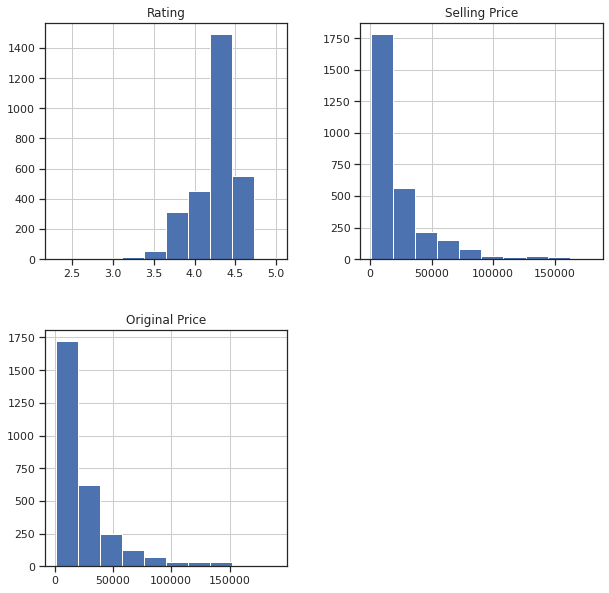

In [41]:
data.hist(figsize=(10,10))
plt.show()

Исходное распределение

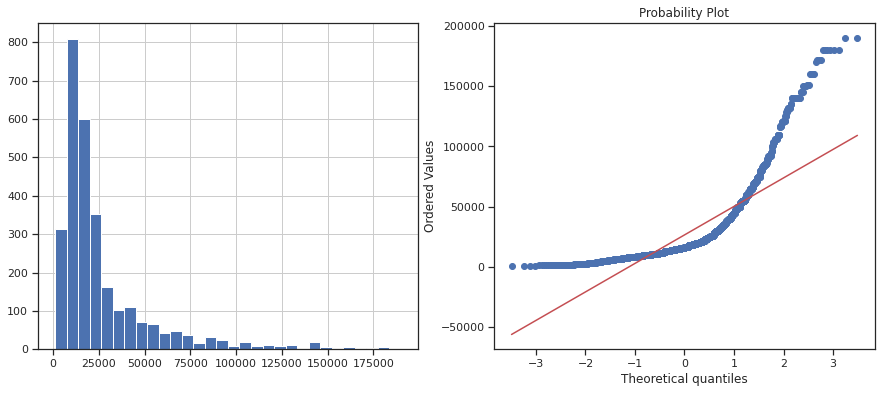

In [45]:
diagnostic_plots(data, 'Original Price')

Квадратный корень

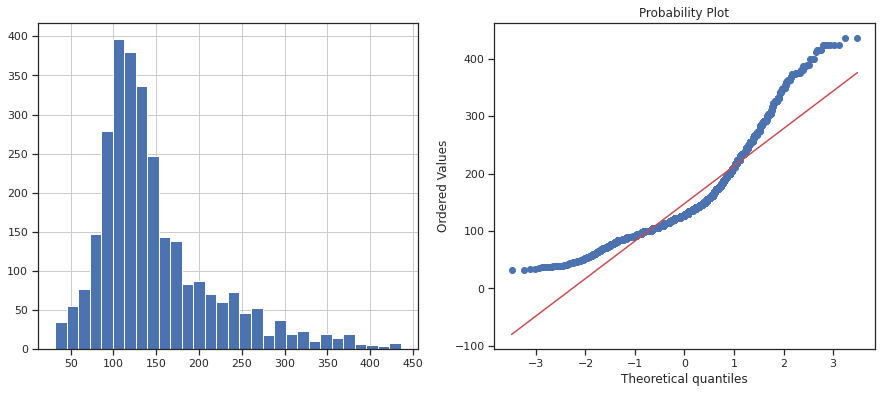

In [48]:
data['OrigPrice_sqr'] = data['Original Price']**(1/2) 
diagnostic_plots(data, 'OrigPrice_sqr')

Преобразование Бокса-Кокса

Оптимальное значение λ = -0.040893432711694704


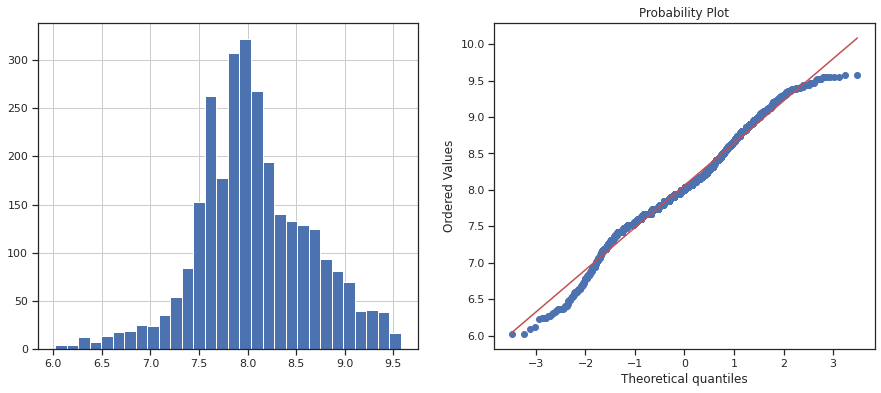

In [47]:
data['OrigPrice_boxcox'], param = stats.boxcox(data['Original Price']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'OrigPrice_boxcox')